In [4]:
import tensorflow as tf

tf.__version__

'2.15.0'

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
X = df.iloc[:, 3:13]
y = df.iloc[:, -1]

In [8]:
geography = pd.get_dummies(X.Geography, drop_first=True)
gender = pd.get_dummies(X.Gender, drop_first=True)

In [9]:
X = X.drop(['Geography', 'Gender'], axis=1)

In [10]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [11]:
X = pd.concat([X, geography, gender], axis=1)

In [12]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
X_train.shape

(8000, 11)

In [18]:
## Creating an ANN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, ReLU, PReLU, ELU
from tensorflow.keras.layers import Dropout

In [19]:
classifier = Sequential()

In [20]:
## Adding the input layer
classifier.add(Dense(units=11, activation='relu'))

In [23]:
## Adding the first hidden layer
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.2))

In [24]:
## Adding the second hidden layer
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dropout(0.2))

In [25]:
## Adding the output layer
classifier.add(Dense(units=1, activation='sigmoid'))

In [28]:
# classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)
classifier.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
 ## Early Stopping
 import tensorflow as tf

 early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [31]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 9s 5ms/step - loss: 0.4782 - accuracy: 0.7953 - val_loss: 0.4498 - val_accuracy: 0.7910
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4450 - accuracy: 0.7983 - val_loss: 0.4164 - val_accuracy: 0.8239
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4023 - accuracy: 0.8240 - val_loss: 0.3841 - val_accuracy: 0.8372
Epoch 4/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3942 - accuracy: 0.8302 - val_loss: 0.3705 - val_accuracy: 0.8448
Epoch 5/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3840 - accuracy: 0.8356 - val_loss: 0.3788 - val_accuracy: 0.8512
Epoch 6/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3830 - accuracy: 0.8328 - val_loss: 0.3866 - val_accuracy: 0.8315
Epoch 7/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3741 - accuracy: 0.8388 - val_loss: 0.3832 - val_accuracy:

In [33]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

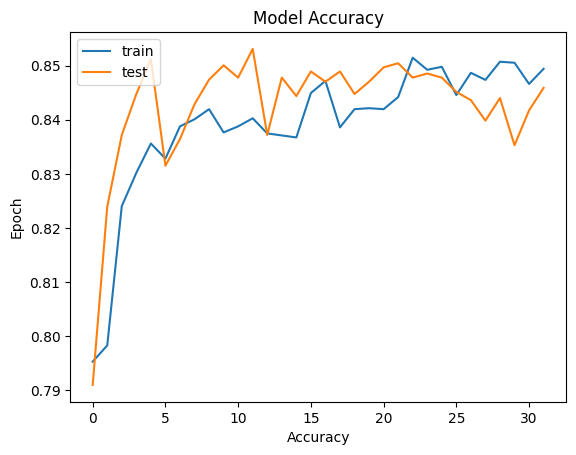

In [34]:
## Summarize history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

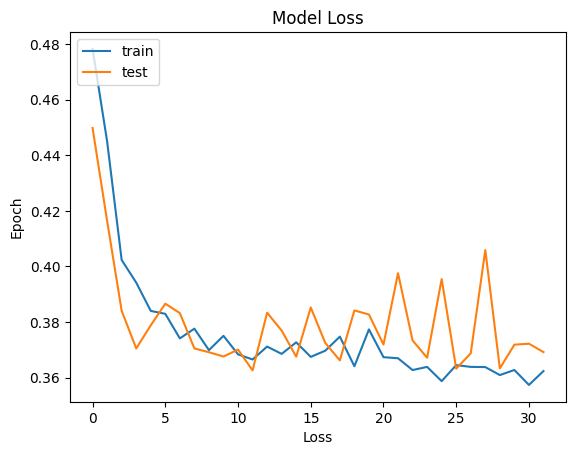

In [35]:
## Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
## Predicting the Test Results

y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score

cf = confusion_matrix(y_test, y_pred)
cf

array([[1532,   75],
       [ 215,  178]])

In [38]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.855